In [1]:
# standard Python packages for scientific computing:
import numpy as np  # Numerical Python
import matplotlib.pyplot as plt  # plotting
import math as m
import os  # operating system / file utilities
import sys
from grid1DCartesian import *
module_path = os.path.abspath(os.path.join('tests'))
if module_path not in sys.path:
    sys.path.append(module_path)
from test_grid import *

    
# from numba import jit
# first did "conda install numba".  See
# https://numba.readthedocs.io/en/stable/user/5minguide.html

In [2]:
# default figure size okay if notebook is zoomed for class presentation:
# plt.rcParams["figure.figsize"] = [6.4, 4.8] # default
plt.rcParams["figure.figsize"] = [8.0, 6.0]

In [3]:
# create a subdirectory to hold figures
# (if it doesn't exist already)
os.makedirs("../figs", exist_ok=True)

## Test the Grid1DCartesian class
If the assertion fails, there is something wrong.

In [31]:
test_Grid1DCartesian()

## Older stuff

In [4]:
def init_smooth(N):
    # created the grid
    x = np.linspace(0, 1, N+1)
    x = (x[0:-1] + x[1:]) / 2
    u = np.zeros(np.size(x))
    
    # set initial conditions
    u = 1 * np.exp(- (x-0.3) ** 2 / 0.07 ** 2)
    
    return x, u

def init_step(N):
    # created the grid
    x = np.linspace(0, 1, N+1)
    x = (x[0:-1] + x[1:]) / 2
    u = np.zeros(np.size(x))
    
    # set initial conditions
    u = 1 * np.exp(- (x-0.3) ** 2 / 0.07 ** 2)
    where = np.where(np.abs(x-0.7) <= 0.1)[0]
    u[where] = 1

    return x, u

In [5]:
N = 100
x, u = init_step(N)

In [6]:
Nghost = 4
xmin = -5
xmax = 5
val = Grid1DCartesian(xmin, xmax, N, Nghost)
x = val.get_grid('grid')
u = np.cos(2.732 * np.pi * (x - xmin) / (xmax - xmin))

In [7]:
np.size(val._x)

108

In [8]:
np.size(val._u)

108

In [9]:
# define values at the ghost cells as the value of the nearest grid cell
ghost_indices = np.zeros(Nghost, dtype = int)
add_indices = np.concatenate((ghost_indices, ghost_indices + N))
ghost_values = np.ones(Nghost)
add_values = np.concatenate((ghost_values * u[0], ghost_values * u[-1]))
u_all = np.insert(u, add_indices, add_values)

In [10]:
np.size(u_all)

108

In [11]:
val.set_value(u_all)

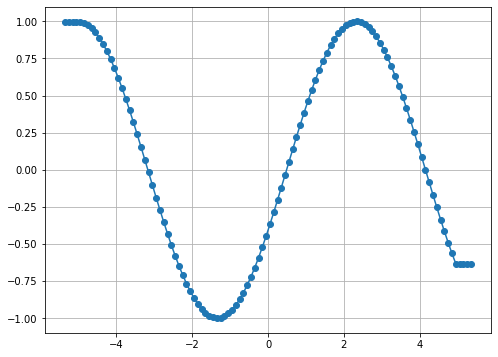

In [12]:
xx = val.get_grid()
vv = val.get_value()

plt.plot(xx,vv,'-o')
plt.grid()

In [13]:
assert val.get_ndims() == 1

In [14]:
a = val.get_first_grid()
a

array([4])

In [15]:
b = val.get_last_grid()
b

array([104])

In [16]:
xx[a]

array([-4.95])

In [17]:
xx[b]

array([5.05])

In [18]:
xx[a[0]:b[0]]

array([-4.95, -4.85, -4.75, -4.65, -4.55, -4.45, -4.35, -4.25, -4.15,
       -4.05, -3.95, -3.85, -3.75, -3.65, -3.55, -3.45, -3.35, -3.25,
       -3.15, -3.05, -2.95, -2.85, -2.75, -2.65, -2.55, -2.45, -2.35,
       -2.25, -2.15, -2.05, -1.95, -1.85, -1.75, -1.65, -1.55, -1.45,
       -1.35, -1.25, -1.15, -1.05, -0.95, -0.85, -0.75, -0.65, -0.55,
       -0.45, -0.35, -0.25, -0.15, -0.05,  0.05,  0.15,  0.25,  0.35,
        0.45,  0.55,  0.65,  0.75,  0.85,  0.95,  1.05,  1.15,  1.25,
        1.35,  1.45,  1.55,  1.65,  1.75,  1.85,  1.95,  2.05,  2.15,
        2.25,  2.35,  2.45,  2.55,  2.65,  2.75,  2.85,  2.95,  3.05,
        3.15,  3.25,  3.35,  3.45,  3.55,  3.65,  3.75,  3.85,  3.95,
        4.05,  4.15,  4.25,  4.35,  4.45,  4.55,  4.65,  4.75,  4.85,
        4.95])

In [ ]:
# define variables
h = 